<a href="https://colab.research.google.com/github/adityav1810/Semester_5_Labs/blob/master/ECSE303L-AIandML/Lab14/Lab14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective: To demonstrates the concept of clustering techniques







#Clustering

It is the task of partitioning the dataset into groups, called clusters. The goal is to split up the data ins such a way that points within a single cluster are very similar and points in a different cluster are different

##K-means clustering
•	Tries to find cluster centers that are representative of certain regions of the data

•	Alternates between two steps: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it

•	The algorithm is finished when the assignment of instances to clusters no longer changes

##Hierarchical clustering
Hierarchical methods can be either divisive or agglomerative. A hierarchical clustering is a set of nested clusters that are arranged as a tree.
In hierarchical clustering one can stop at any number of clusters, one finds appropriate by interpreting the dendrogram.

Agglomerative methods begin with ‘n’ clusters and sequentially combine similar clusters until only one cluster is obtained.

Divisive methods work in the opposite direction, beginning with one cluster that includes all the records and Hierarchical methods are especially useful when the target is to arrange the clusters into a natural hierarchy.
In Hierarchical Clustering, results are reproducible in Hierarchical clustering. Hierarchical clustering don’t work as well as, k means when the shape of the clusters is hyper spherical.

##DBSCAN
Stands for “density based spatial clustering of applications with noise”

•	does not require the user to set the number of clusters a priori

•	can capture clusters of complex shapes

•	can identify points that are not part of any cluster (very useful as outliers detector)

•	is somewhat slower than agglomerative clustering and k-means, but still scales to relatively large datasets.

•	works by identifying points that are in crowded regions of the feature space, where many data points are close together (dense regions in feature space)

•	Points that are within a dense region are called core samples (or core points)

•	There are two parameters in DBSCAN: min_samples and eps

•	If there are at least min_samples many data points within a distance of eps to a given data point, that data point is classified as a core sample

•	core samples that are closer to each other than the distance eps are put into the same cluster by DBSCAN.

# Dataset 1 for k-means and hierarchical clustering:
 The dataset consists of Annual income (in $000) and their total spend (in $000) on an e-commerce site for a period of one year. Let us explore the data using numpy and pandas libraries in python.

##Attributes:
1. CustomerID: It is the unique ID given to a customer
2. Gender: Gender of the customer
3. Age: The age of the customer
4. Annual Income(k$): It is the annual income of the customer
5. Spending Score: It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.

##Source
https://www.kaggle.com/akram24/mall-customers

#Dataset 2: Credit Card Dataset for Clustering for DBSCAN

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

##Attributes:
1.	CUSTID : Identification of Credit Card holder (Categorical)
2.	BALANCE : Balance amount left in their account to make purchases (
3.	BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4.	PURCHASES : Amount of purchases made from account
5.	ONEOFFPURCHASES : Maximum purchase amount done in one-go
6.	INSTALLMENTSPURCHASES : Amount of purchase done in installment
7.	CASHADVANCE : Cash in advance given by the user
8.	PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9.	ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10.	PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11.	CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
12.	CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
13.	PURCHASESTRX : Numbe of purchase transactions made
14.	CREDITLIMIT : Limit of Credit Card for user
15.	PAYMENTS : Amount of Payment done by user
16.	MINIMUM_PAYMENTS : Minimum amount of payments made by user
17.	PRCFULLPAYMENT : Percent of full payment paid by user
18.	TENURE : Tenure of credit card service for user

##Source 
https://www.kaggle.com/arjunbhasin2013/ccdata

###Task 1: K Means Clustering
1.	Obtain the dataset.
2.	Select the potential features for clustering such as Annual Income and Spending Score.
3.	Define the value of K
4.	Apply K–means clustering
5.	Visualize the clusters
6.	Scale the value of K and visualize the clusters
7.	Obtain the optimal number of clusters by using the Elbow method and visualize the clusters

### Task 2: Hierarchical clustering
1.	Obtain the dataset
2.	Select the potential features for clustering such as Annual Income and Spending Score.
3.	Implement dendrogram to obtain the optimal numbers of clusters
4.	Apply hierarchical clustering on the data
5.	Visualize the clusters


### Task 3: DBSCAN
1.	Load the dataset
2.	Drop customer ID from the dataset
3.	Handle missing values
4.	Apply data pre-processing techniques
5.	 Reducing the dimensionality of the data by using PCA
6.	Build DBSCAN model
7.	Visualize the clusters
8.	Tune the parameters of DBSCAN

### Optional (not included in evaluation)
1.	Measure the performance using adjusted_rand_score. 
2.	Apply improved versions of k-means and DBSCAN algorithms

## Suggested links:
Difference between various clustering approaches please see:
https://scikit-learn.org/stable/modules/clustering.html

https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html

https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d
https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea
https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/


##Task 1: K Means Clustering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
warnings.filterwarnings("ignore")

In [ ]:
#Obtain the dataset.
df=pd.read_csv('Mall_Customers.csv')
df['Genre']=df['Genre'].apply(lambda x : 1 if x=='Male' else 0)
df.drop('CustomerID',axis=1,inplace=True)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
X=df['Annual Income (k$)']
y=df['Spending Score (1-100)']

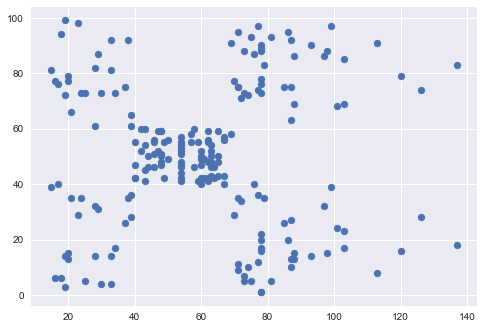

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.scatter(X,y)

In [ ]:
model=KMeans(n_clusters=5,random_state=42,init='random',max_iter=300)
model.fit(np.array(X).reshape(-1,1),y)

KMeans(init='random', n_clusters=5, random_state=42)

In [ ]:
pred=model.fit_predict(np.array(X).reshape(-1,1))

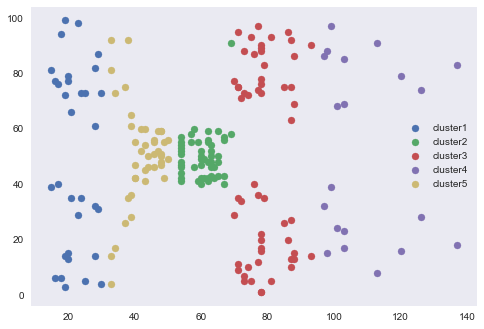

In [ ]:
plt.scatter(X[pred==0],y[pred==0],label='cluster1')
plt.scatter(X[pred==1],y[pred==1],label='cluster2')
plt.scatter(X[pred==2],y[pred==2],label='cluster3')
plt.scatter(X[pred==3],y[pred==3],label='cluster4')
plt.scatter(X[pred==4],y[pred==4],label='cluster5')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

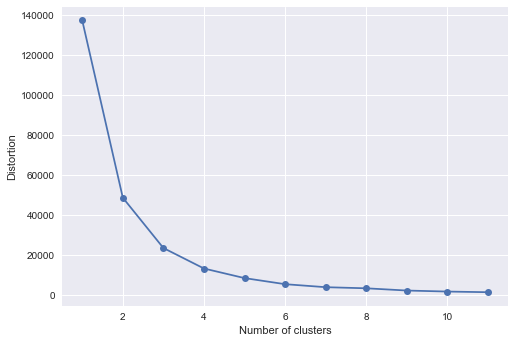

In [ ]:
distortions = []
for i in range(1, 12):
    km = KMeans(n_clusters=i, init='random', max_iter=300)
    km.fit(np.array(X).reshape(-1,1))
    distortions.append(km.inertia_)
plt.plot(range(1, 12), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

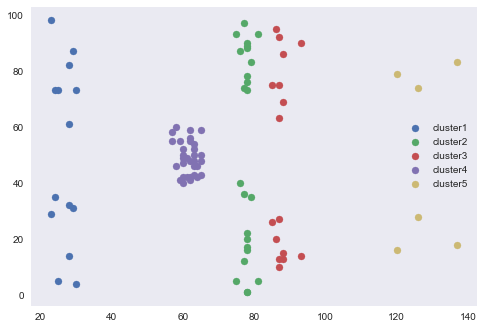

In [ ]:
#Obtain the optimal number of clusters by using the Elbow method and visualize the clusters
model=KMeans(n_clusters=10,random_state=42,init='random',max_iter=300)
model.fit(np.array(X).reshape(-1,1),y)
pred=model.fit_predict(np.array(X).reshape(-1,1))
plt.scatter(X[pred==0],y[pred==0],label='cluster1')
plt.scatter(X[pred==1],y[pred==1],label='cluster2')
plt.scatter(X[pred==2],y[pred==2],label='cluster3')
plt.scatter(X[pred==3],y[pred==3],label='cluster4')
plt.scatter(X[pred==4],y[pred==4],label='cluster5')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## Task 2: Hierarchical clustering

In [ ]:
#Obtain the dataset

In [ ]:
#Select the potential features for clustering such as Annual Income and Spending Score.
X.shape

(200,)

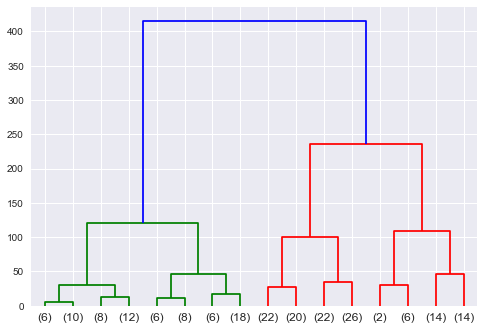

In [ ]:
#Implement dendrogram to obtain the optimal numbers of clusters
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(np.array(X).reshape(-1,1))
plot_dendrogram(model, truncate_mode='level', p=3)

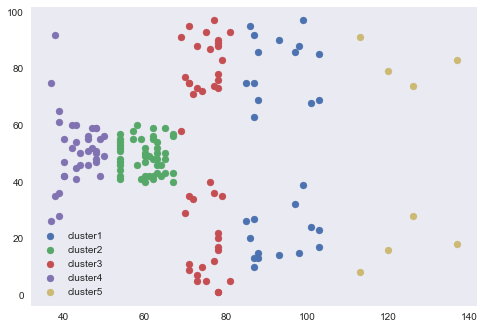

In [ ]:
#Apply hierarchical clustering on the data
model = AgglomerativeClustering(n_clusters=7)
model = model.fit(np.array(X).reshape(-1,1))
pred=model.fit_predict(np.array(X).reshape(-1,1))
plt.scatter(X[pred==0],y[pred==0],label='cluster1')
plt.scatter(X[pred==1],y[pred==1],label='cluster2')
plt.scatter(X[pred==2],y[pred==2],label='cluster3')
plt.scatter(X[pred==3],y[pred==3],label='cluster4')
plt.scatter(X[pred==4],y[pred==4],label='cluster5')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## Task 3: DBSCAN

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Load the dataset
df=pd.read_csv("CC GENERAL.csv")
df.drop('CUST_ID',axis=1,inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
#Handle missing values
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
misscols=list(df.isnull().any()[df.isnull().any()==True].index)
imp=KNNImputer(n_neighbors=10)
df[misscols]=imp.fit_transform(df[misscols])
scaler=MinMaxScaler()
df=scaler.fit_transform(df)

In [ ]:
df

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
# Reducing the dimensionality of the data by using PCA
df = 1 - cosine_similarity(df)
pca=PCA(n_components=2,random_state=42)
df=pca.fit_transform(dist)
df

array([[ -8.60027525,  -3.4276572 ],
       [-10.93250867,   0.80638935],
       [  4.00474741,   1.74419799],
       ...,
       [ 19.7752081 ,  13.92051943],
       [ -0.64898615,  23.74018645],
       [ 13.4096869 ,  21.48701334]])

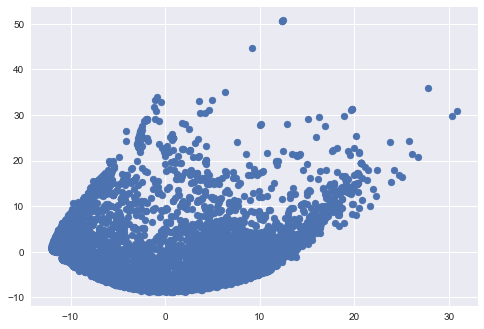

In [ ]:
plt.style.use('seaborn')
plt.scatter(df[:,0],df[:,1])

In [ ]:
#Build DBSCAN model
model=DBSCAN(n_jobs=3,min_samples=20)
model.fit(df)

DBSCAN(min_samples=20, n_jobs=3)

<AxesSubplot:>

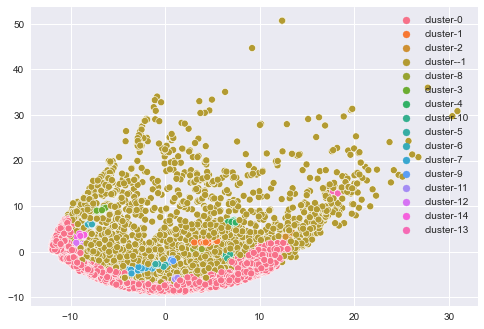

In [ ]:
#Visualize the clusters
import seaborn as sns
labels=model.labels_
sns.scatterplot(df[:,0], df[:,1], hue=["cluster-{}".format(x) for x in labels])

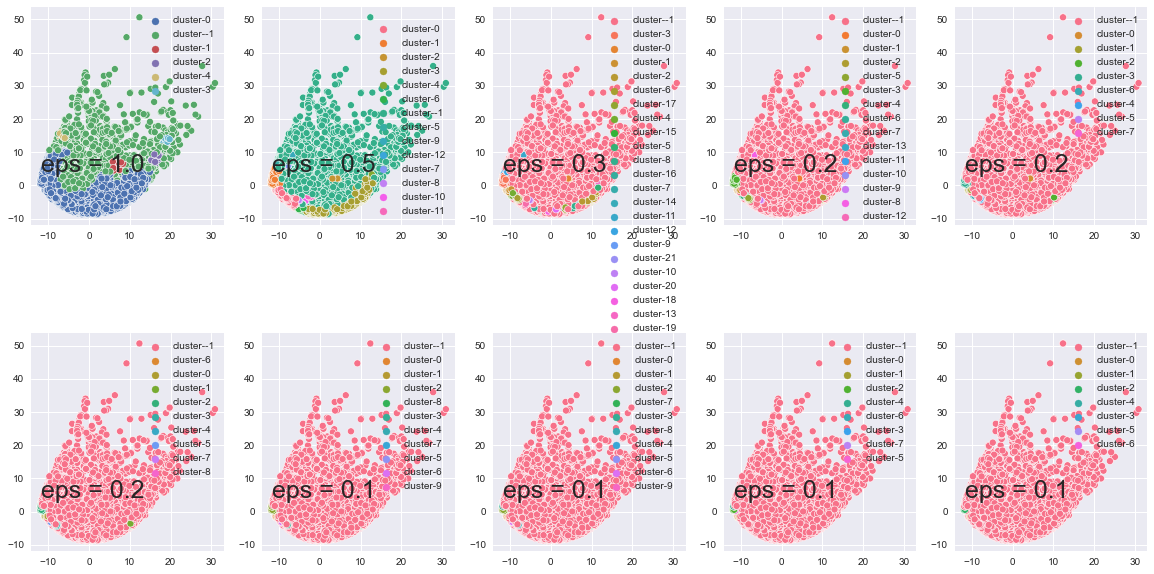

In [ ]:
#Tune the parameters of DBSCAN
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=30).fit(df)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 1)), fontsize=25, ha="center")
    sns.scatterplot(df[:,0], df[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1

## Optional (not included in evaluation)

In [ ]:
#	Measure the performance using adjusted_rand_score. 


In [ ]:
#	Apply improved versions of k-means and DBSCAN algorithms
